# ML-ZC Homework 4

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv("/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning_zoomcamp/bank+marketing/bank/bank-full.csv", sep=';')

# Select the specified columns
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns_to_use]

# Split the data into train+validation and test sets
train_val, test = train_test_split(df, test_size=0.2, random_state=1)

# Split the train+validation set into train and validation sets
train, val = train_test_split(train_val, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# Print the shapes of the resulting datasets
print("Train set shape:", train.shape)
print("Validation set shape:", val.shape)
print("Test set shape:", test.shape)

# Verify the proportions
total = len(df)
print(f"Train set percentage: {len(train)/total:.2%}")
print(f"Validation set percentage: {len(val)/total:.2%}")
print(f"Test set percentage: {len(test)/total:.2%}")

Train set shape: (27126, 15)
Validation set shape: (9042, 15)
Test set shape: (9043, 15)
Train set percentage: 60.00%
Validation set percentage: 20.00%
Test set percentage: 20.00%


# Question 1: ROC AUC feature importance

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the data (assuming we're continuing from the previous code)
df = pd.read_csv("/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning_zoomcamp/bank+marketing/bank/bank-full.csv", sep=';')

# Select the specified columns
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns_to_use]

# Split the data
train, _, _ = np.split(df.sample(frac=1, random_state=1), 
                       [int(.6*len(df)), int(.8*len(df))])

# Convert target variable to binary
train['y'] = (train['y'] == 'yes').astype(int)

# Function to calculate AUC and invert if necessary
def calculate_auc(feature):
    auc = roc_auc_score(train['y'], train[feature])
    if auc < 0.5:
        auc = roc_auc_score(train['y'], -train[feature])
    return auc

# Calculate AUC for each specified numerical variable
numerical_vars = ['balance', 'day', 'duration']
auc_scores = {var: calculate_auc(var) for var in numerical_vars}

# Find the variable with the highest AUC
best_var = max(auc_scores, key=auc_scores.get)

print("AUC scores:")
for var, auc in auc_scores.items():
    print(f"{var}: {auc:.4f}")

print(f"\nThe variable with the highest AUC is: {best_var}")

AUC scores:
balance: 0.5888
day: 0.5272
duration: 0.8033

The variable with the highest AUC is: duration


# Question 2: Training the model

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load the data
df = pd.read_csv("/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning_zoomcamp/bank+marketing/bank/bank-full.csv", sep=';')

# Select the specified columns
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns_to_use]

# Split the data
train, val, test = np.split(df.sample(frac=1, random_state=1), 
                            [int(.6*len(df)), int(.8*len(df))])

# Convert target variable to binary
train['y'] = (train['y'] == 'yes').astype(int)
val['y'] = (val['y'] == 'yes').astype(int)

# Prepare the features
def prepare_features(df):
    return df.drop('y', axis=1).to_dict(orient='records')

# Prepare the target
def prepare_target(df):
    return df['y'].values

# Prepare train and validation data
train_features = prepare_features(train)
train_target = prepare_target(train)
val_features = prepare_features(val)
val_target = prepare_target(val)

# Create and fit DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_features)
X_val = dv.transform(val_features)

# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, train_target)

# Make predictions on validation set
val_predictions = model.predict_proba(X_val)[:, 1]

# Calculate AUC
auc = roc_auc_score(val_target, val_predictions)

print(f"AUC on validation dataset: {auc:.4f}")

AUC on validation dataset: 0.9123


# Question 3: Precision and Recall

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


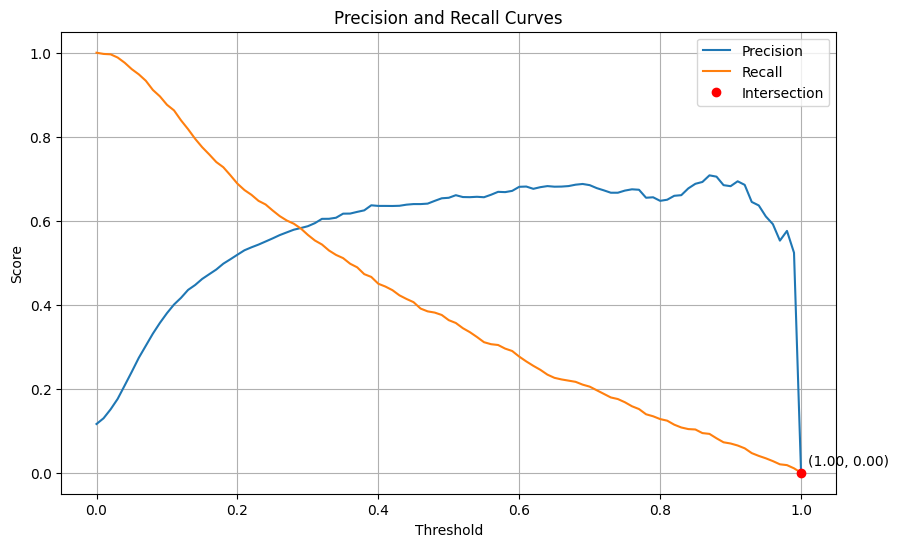

Precision and recall curves intersect at threshold: 1.00
At this threshold, precision and recall are both approximately: 0.00


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# Load and prepare data (assuming we're continuing from the previous code)
df = pd.read_csv("/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning_zoomcamp/bank+marketing/bank/bank-full.csv", sep=';')
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns_to_use]

train, val, _ = np.split(df.sample(frac=1, random_state=1), [int(.6*len(df)), int(.8*len(df))])

train['y'] = (train['y'] == 'yes').astype(int)
val['y'] = (val['y'] == 'yes').astype(int)

def prepare_features(df):
    return df.drop('y', axis=1).to_dict(orient='records')

def prepare_target(df):
    return df['y'].values

train_features = prepare_features(train)
train_target = prepare_target(train)
val_features = prepare_features(val)
val_target = prepare_target(val)

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_features)
X_val = dv.transform(val_features)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, train_target)

val_predictions = model.predict_proba(X_val)[:, 1]

# Compute precision and recall for various thresholds
thresholds = np.arange(0, 1.01, 0.01)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred = (val_predictions >= threshold).astype(int)
    precisions.append(precision_score(val_target, y_pred))
    recalls.append(recall_score(val_target, y_pred))

# Plot precision and recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall Curves')
plt.legend()
plt.grid(True)

# Find intersection point
intersection_idx = np.argmin(np.abs(np.array(precisions) - np.array(recalls)))
intersection_threshold = thresholds[intersection_idx]
intersection_score = (precisions[intersection_idx] + recalls[intersection_idx]) / 2

plt.plot(intersection_threshold, intersection_score, 'ro', label='Intersection')
plt.annotate(f'({intersection_threshold:.2f}, {intersection_score:.2f})', 
             (intersection_threshold, intersection_score),
             xytext=(5, 5), textcoords='offset points')

plt.legend()
plt.show()

print(f"Precision and recall curves intersect at threshold: {intersection_threshold:.2f}")
print(f"At this threshold, precision and recall are both approximately: {intersection_score:.2f}")

# Question 4: F1 score

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


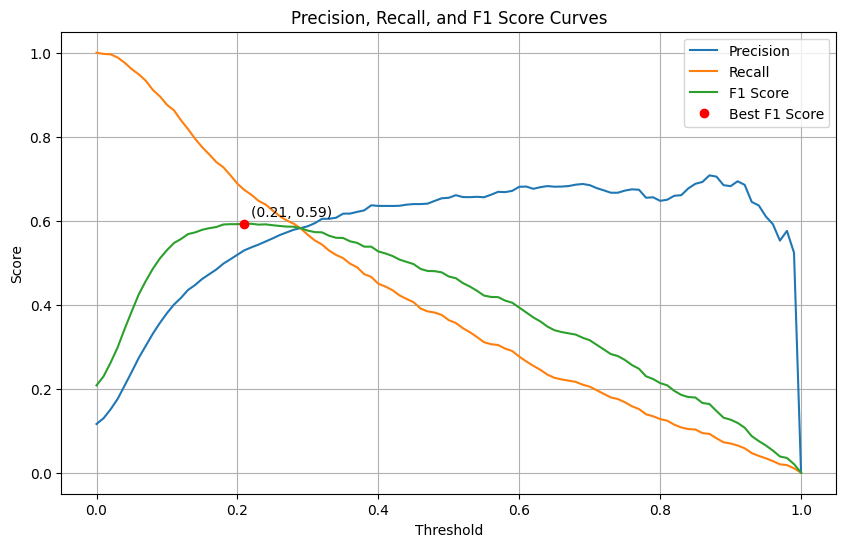

The highest F1 score is 0.5928 at threshold 0.21
At this threshold:
  Precision: 0.5296
  Recall: 0.6730


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and prepare data (assuming we're continuing from the previous code)
df = pd.read_csv("/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning_zoomcamp/bank+marketing/bank/bank-full.csv", sep=';')
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns_to_use]

train, val, _ = np.split(df.sample(frac=1, random_state=1), [int(.6*len(df)), int(.8*len(df))])

train['y'] = (train['y'] == 'yes').astype(int)
val['y'] = (val['y'] == 'yes').astype(int)

def prepare_features(df):
    return df.drop('y', axis=1).to_dict(orient='records')

def prepare_target(df):
    return df['y'].values

train_features = prepare_features(train)
train_target = prepare_target(train)
val_features = prepare_features(val)
val_target = prepare_target(val)

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_features)
X_val = dv.transform(val_features)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, train_target)

val_predictions = model.predict_proba(X_val)[:, 1]

# Compute precision, recall, and F1 score for various thresholds
thresholds = np.arange(0, 1.01, 0.01)
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (val_predictions >= threshold).astype(int)
    precisions.append(precision_score(val_target, y_pred))
    recalls.append(recall_score(val_target, y_pred))
    f1_scores.append(f1_score(val_target, y_pred))

# Plot precision, recall, and F1 score curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score Curves')
plt.legend()
plt.grid(True)

# Find the threshold with the highest F1 score
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
best_f1 = f1_scores[best_f1_idx]

plt.plot(best_threshold, best_f1, 'ro', label='Best F1 Score')
plt.annotate(f'({best_threshold:.2f}, {best_f1:.2f})', 
             (best_threshold, best_f1),
             xytext=(5, 5), textcoords='offset points')

plt.legend()
plt.show()

print(f"The highest F1 score is {best_f1:.4f} at threshold {best_threshold:.2f}")
print(f"At this threshold:")
print(f"  Precision: {precisions[best_f1_idx]:.4f}")
print(f"  Recall: {recalls[best_f1_idx]:.4f}")

# Question 5 STD for 5-Fold CV

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load the data
df = pd.read_csv("/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning_zoomcamp/bank+marketing/bank/bank-full.csv", sep=';')

# Select the specified columns
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns_to_use]

# Convert target variable to binary
df['y'] = (df['y'] == 'yes').astype(int)

# Prepare features and target
def prepare_features(df):
    return df.drop('y', axis=1).to_dict(orient='records')

def prepare_target(df):
    return df['y'].values

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)

# Initialize list to store AUC scores
auc_scores = []

# Perform K-Fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(df), 1):
    df_train = df.iloc[train_idx]
    df_val = df.iloc[val_idx]
    
    # Prepare features and target
    X_train = prepare_features(df_train)
    y_train = prepare_target(df_train)
    X_val = prepare_features(df_val)
    y_val = prepare_target(df_val)
    
    # Fit DictVectorizer on training data and transform both training and validation data
    X_train_vect = dv.fit_transform(X_train)
    X_val_vect = dv.transform(X_val)
    
    # Train the model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_vect, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict_proba(X_val_vect)[:, 1]
    
    # Calculate AUC score
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)
    
    print(f"Fold {fold} AUC: {auc:.4f}")

# Calculate mean and standard deviation of AUC scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f"\nMean AUC: {mean_auc:.4f}")
print(f"Standard Deviation of AUC: {std_auc:.4f}")

Fold 1 AUC: 0.9063
Fold 2 AUC: 0.8991
Fold 3 AUC: 0.9053
Fold 4 AUC: 0.9124
Fold 5 AUC: 0.9062

Mean AUC: 0.9059
Standard Deviation of AUC: 0.0042


# Question 6: Best C

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load the data
df = pd.read_csv("/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning_zoomcamp/bank+marketing/bank/bank-full.csv", sep=';')

# Select the specified columns
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns_to_use]

# Convert target variable to binary
df['y'] = (df['y'] == 'yes').astype(int)

# Prepare features and target
def prepare_features(df):
    return df.drop('y', axis=1).to_dict(orient='records')

def prepare_target(df):
    return df['y'].values

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)

# C values to test
c_values = [0.000001, 0.001, 1]

# Dictionary to store results
results = {}

# Perform cross-validation for each C value
for C in c_values:
    auc_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(df), 1):
        df_train = df.iloc[train_idx]
        df_val = df.iloc[val_idx]
        
        # Prepare features and target
        X_train = prepare_features(df_train)
        y_train = prepare_target(df_train)
        X_val = prepare_features(df_val)
        y_val = prepare_target(df_val)
        
        # Fit DictVectorizer on training data and transform both training and validation data
        X_train_vect = dv.fit_transform(X_train)
        X_val_vect = dv.transform(X_val)
        
        # Train the model
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_vect, y_train)
        
        # Make predictions on validation set
        y_pred = model.predict_proba(X_val_vect)[:, 1]
        
        # Calculate AUC score
        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)
    
    # Calculate mean and standard deviation of AUC scores
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    # Store results
    results[C] = {
        'mean_auc': round(mean_auc, 3),
        'std_auc': round(std_auc, 3)
    }

# Print results
for C, metrics in results.items():
    print(f"C = {C}:")
    print(f"  Mean AUC: {metrics['mean_auc']}")
    print(f"  Std AUC: {metrics['std_auc']}")
    print()

# Find best C
best_C = max(results, key=lambda C: results[C]['mean_auc'])
print(f"The best C value is {best_C} with a mean AUC of {results[best_C]['mean_auc']}")

C = 1e-06:
  Mean AUC: 0.705
  Std AUC: 0.011

C = 0.001:
  Mean AUC: 0.868
  Std AUC: 0.006

C = 1:
  Mean AUC: 0.906
  Std AUC: 0.004

The best C value is 1 with a mean AUC of 0.906
